# Explore here

In [25]:
import pandas as pd

# Cargar conjunto de datos
train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

# Mostrar las primeras filas del dataframe
print(train_data.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


EDA DATOS

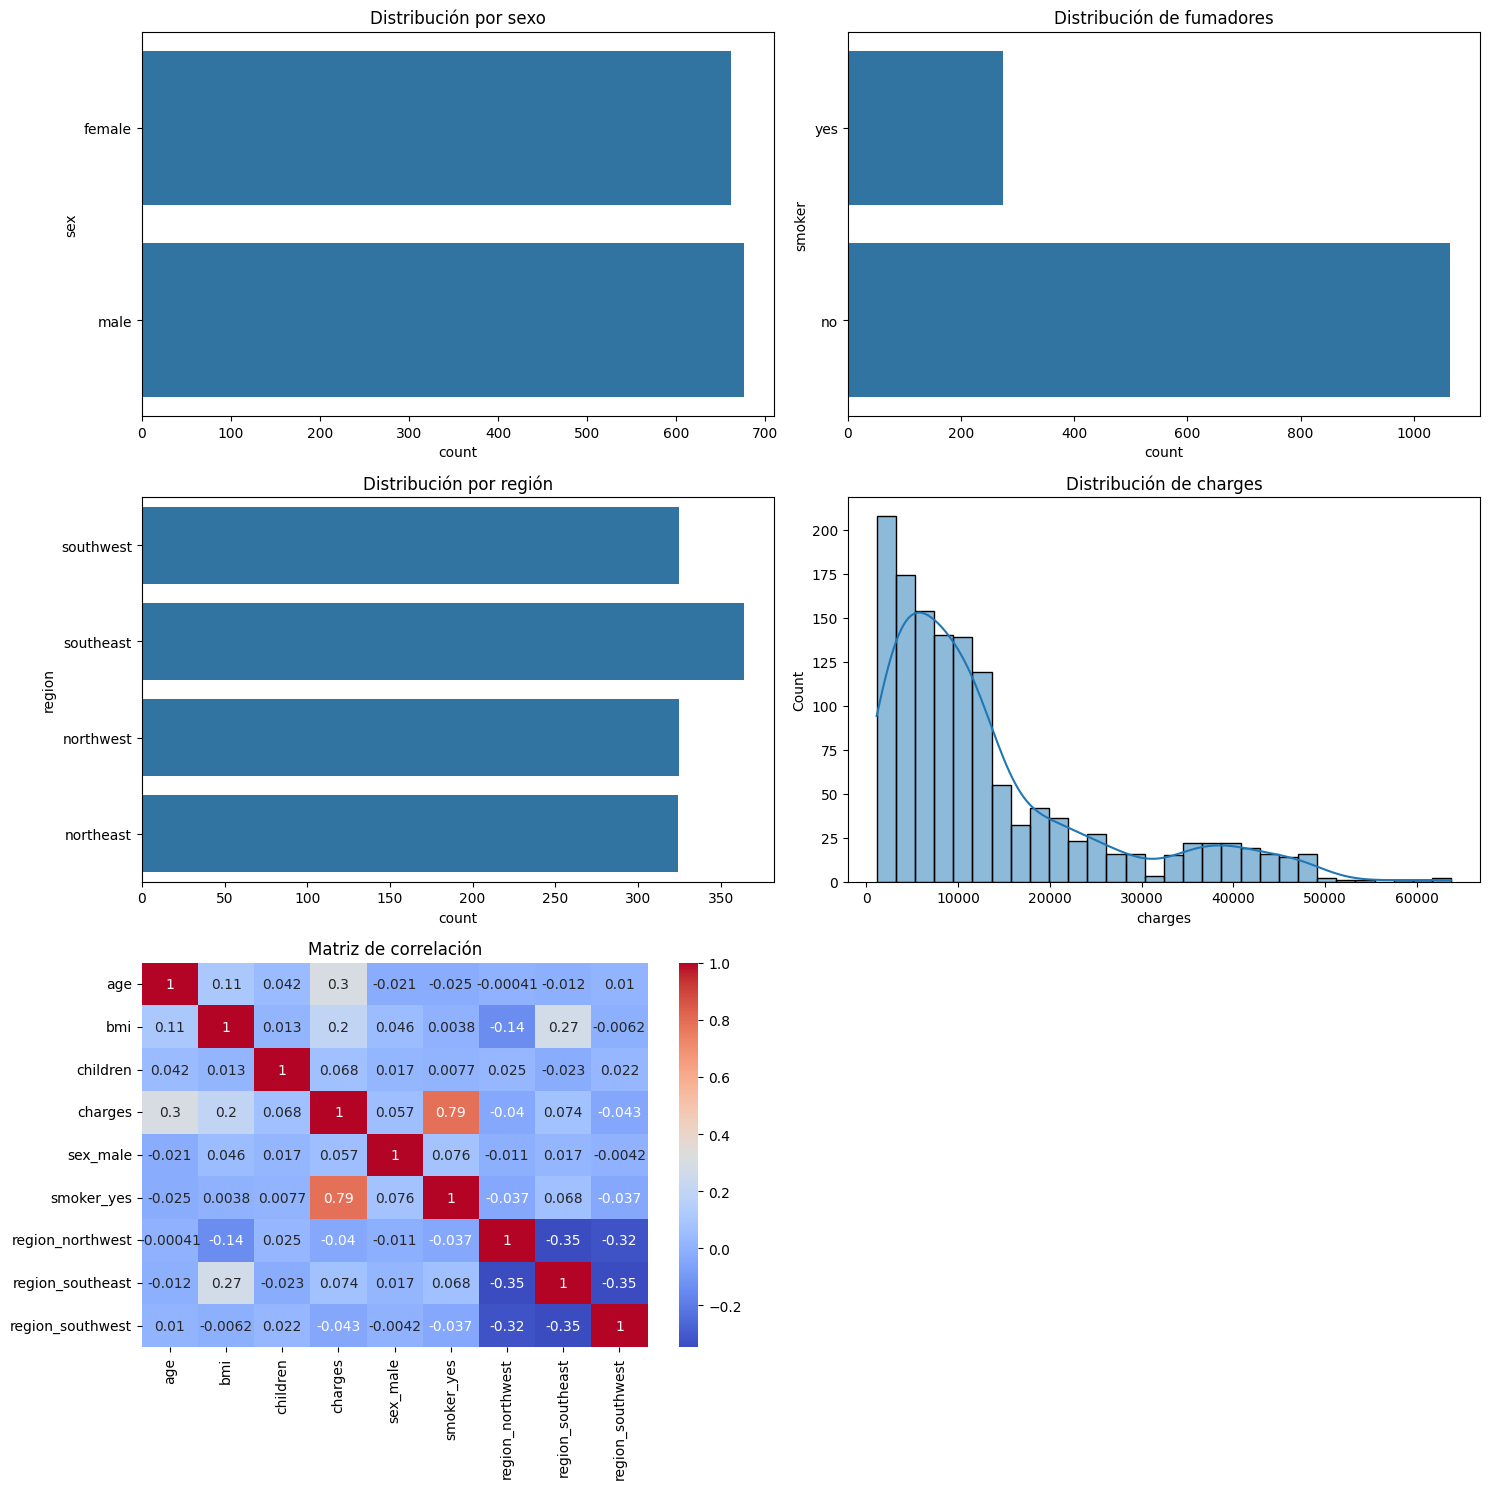

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear figura con subplots
fig, axis = plt.subplots(3, 2, figsize=(15, 15))

# Distribución de las variables categóricas
sns.countplot(train_data['sex'], ax=axis[0, 0])
axis[0, 0].set_title('Distribución por sexo')

sns.countplot(train_data['smoker'], ax=axis[0, 1])
axis[0, 1].set_title('Distribución de fumadores')

sns.countplot(train_data['region'], ax=axis[1, 0])
axis[1, 0].set_title('Distribución por región')

# Distribución de la variable numérica 'charges'
sns.histplot(train_data['charges'], bins=30, kde=True, ax=axis[1, 1])
axis[1, 1].set_title('Distribución de charges')

# Convertir variables categóricas en variables dummy
data_dummies = pd.get_dummies(train_data, drop_first=True)

# Matriz de correlación
correlation_matrix = data_dummies.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axis[2, 0])
axis[2, 0].set_title('Matriz de correlación')


# Ajustar el layout
fig.delaxes(axis[2, 1])
plt.tight_layout()
plt.show()



DIVISION EN TRAIN Y TEST

In [30]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = data_dummies.drop('charges', axis=1)
y = data_dummies['charges']

# Dividir el conjunto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(1070, 8) (268, 8)


Construcción y entreno Modelo Regresión lineal

In [31]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Obtener el intercepto y los coeficientes
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")


Intercepto (a): -11931.21905032666
Coeficientes (b): [ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]


Predicciones modelo

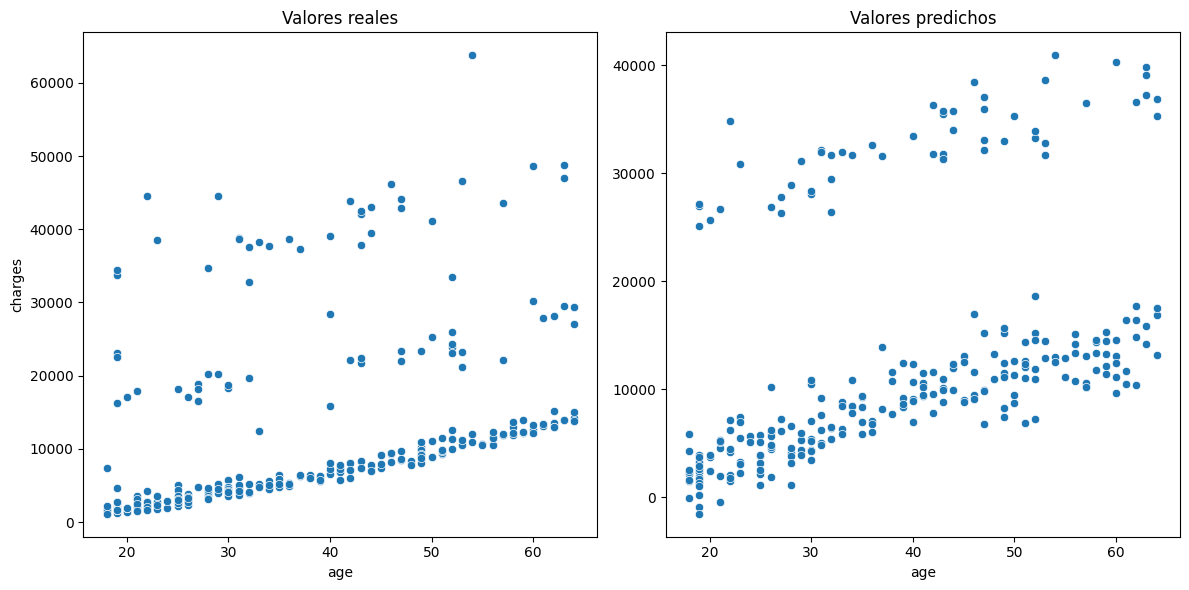

In [34]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Comparar las predicciones con los valores reales
fig, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plot para valores reales
sns.scatterplot(ax=axis[0], x=X_test['age'], y=y_test)
axis[0].set_title('Valores reales')

# Plot para valores predichos
sns.scatterplot(ax=axis[1], x=X_test['age'], y=y_pred)
axis[1].set_title('Valores predichos')

plt.tight_layout()
plt.show()



Evaluación Modelo

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio: {mse}")
print(f"Coeficiente de determinación: {r2}")

Error cuadrático medio: 33596915.85136145
Coeficiente de determinación: 0.7835929767120724


Guardar Modelo Completado

In [37]:
import pickle

# Guardar el modelo
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)